<a href="https://colab.research.google.com/github/Rafe2001/Amazon_Review_Analysis/blob/main/Sentiment_Analysis_Amazon_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Amazon Reviews Analysis Using Vader, RoBERTa, and NLTK
  In this project, we use some amazon reviews analysis using the amazing transformer models such as Vader, RoBERTa, and NLTK.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
import nltk

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Reviews.csv")
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
print(df.shape)
df.info()

(568454, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [ ]:
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.dropna(inplace=True)

In [ ]:
df['Text'].values[1]

'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".'

In [ ]:
df.shape

(568411, 10)

##EDA

[]

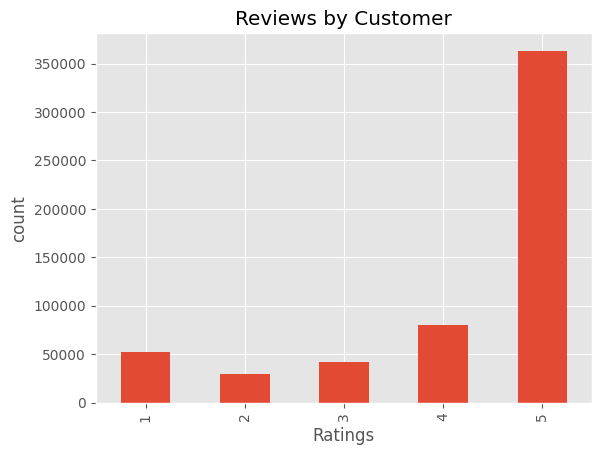

In [ ]:
plt = df['Score'].value_counts().sort_index().plot(kind = 'bar', title='Reviews by Customer')
plt.set_xlabel('Ratings')
plt.set_ylabel('count')
plt.plot()

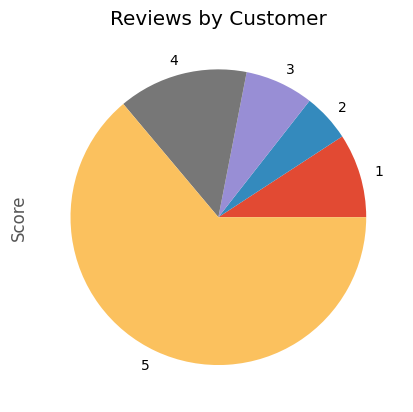

In [ ]:
plt = df['Score'].value_counts().sort_index().plot(kind = 'pie', title='Reviews by Customer')

In [ ]:
df['UserId'].value_counts()[:10]

A3OXHLG6DIBRW8    448
A1YUL9PCJR3JTY    421
AY12DBB0U420B     389
A281NPSIMI1C2R    365
A1Z54EM24Y40LL    256
A1TMAVN4CEM8U8    204
A2MUGFV2TDQ47K    201
A3TVZM3ZIXG8YW    199
A3PJZ8TU8FDQ1K    178
AQQLWCMRNDFGI     176
Name: UserId, dtype: int64

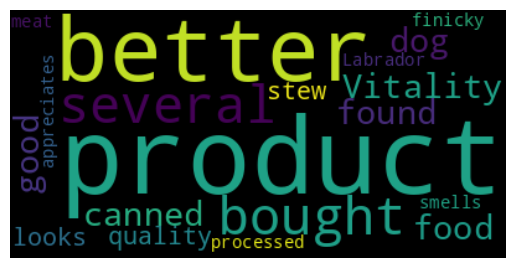

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = df.Text[0]
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

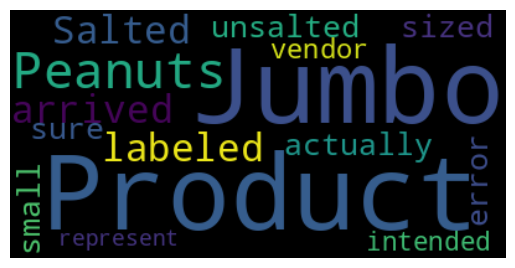

In [ ]:
text = df.Text[1]
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
df = df.head(1000)

In [ ]:
sentence = df.Text[1]
sentence

'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".'

###Tokenization

In [ ]:
nltk.download('punkt')
tokens = nltk.word_tokenize(sentence)
tokens

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['Product',
 'arrived',
 'labeled',
 'as',
 'Jumbo',
 'Salted',
 'Peanuts',
 '...',
 'the',
 'peanuts',
 'were',
 'actually',
 'small',
 'sized',
 'unsalted',
 '.',
 'Not',
 'sure',
 'if',
 'this',
 'was',
 'an',
 'error',
 'or',
 'if',
 'the',
 'vendor',
 'intended',
 'to',
 'represent',
 'the',
 'product',
 'as',
 '``',
 'Jumbo',
 "''",
 '.']

###Frequency Distribution

In [ ]:
from nltk.probability import FreqDist
freq_dist = FreqDist(tokens)
print(freq_dist)
freq_dist.most_common(5)

<FreqDist with 31 samples and 37 outcomes>


[('the', 3), ('as', 2), ('Jumbo', 2), ('.', 2), ('if', 2)]

###Stopwords

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopword = set(stopwords.words('english'))
print(stopword)

{'any', 'when', 'our', 'if', "she's", 'have', 'hers', 'how', 'weren', "you'll", 'but', 'aren', 'she', 'of', 'why', 'each', 's', "isn't", "mustn't", 'once', 'don', 'y', 'where', 'own', 'yours', 'and', 't', 'ourselves', 'haven', 'wasn', "it's", 'under', 'was', 'herself', 'further', 'be', 'needn', 'myself', 'shan', "won't", 'wouldn', 'his', 'then', 'doesn', "haven't", 'theirs', 'those', 'as', 'hadn', 'into', 'again', 'ma', "that'll", 'before', "didn't", 'other', 'which', 'does', 'just', 'yourself', 'should', 'than', 'very', 'against', 'that', 'during', 've', 'did', "you're", 'not', 'were', 'too', 'yourselves', "wouldn't", "weren't", 'more', "shouldn't", 'i', 'your', 'has', 'all', 'shouldn', 'the', 'out', 'or', 'ain', 'him', 'itself', 'from', 'up', 'while', "shan't", 'hasn', 'ours', "you'd", 'at', 'her', 'through', 'had', "wasn't", 'these', 'am', "should've", 'do', 'between', 'isn', 'nor', 'been', 'because', 'after', 'until', 'below', 'only', 'few', 'mustn', 'no', 'having', 'so', 'being', 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


###POS Tagging

In [ ]:
nltk.download('averaged_perceptron_tagger')
part_of_speech = nltk.pos_tag(tokens)
part_of_speech

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('Product', 'NNP'),
 ('arrived', 'VBD'),
 ('labeled', 'VBN'),
 ('as', 'IN'),
 ('Jumbo', 'NNP'),
 ('Salted', 'NNP'),
 ('Peanuts', 'NNP'),
 ('...', ':'),
 ('the', 'DT'),
 ('peanuts', 'NNS'),
 ('were', 'VBD'),
 ('actually', 'RB'),
 ('small', 'JJ'),
 ('sized', 'VBN'),
 ('unsalted', 'JJ'),
 ('.', '.'),
 ('Not', 'RB'),
 ('sure', 'JJ'),
 ('if', 'IN'),
 ('this', 'DT'),
 ('was', 'VBD'),
 ('an', 'DT'),
 ('error', 'NN'),
 ('or', 'CC'),
 ('if', 'IN'),
 ('the', 'DT'),
 ('vendor', 'NN'),
 ('intended', 'VBN'),
 ('to', 'TO'),
 ('represent', 'VB'),
 ('the', 'DT'),
 ('product', 'NN'),
 ('as', 'IN'),
 ('``', '``'),
 ('Jumbo', 'NNP'),
 ("''", "''"),
 ('.', '.')]

##Vader Sentiment Analysis
Vader is very intelligent in knowing positive and negative sentences based on the words in the sentence.

The Compound score in Vader is a measurement that adds together all lexical ratings that have been scaled between -1 (the most extreme negative) and +1. (most extreme positive).

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
from tqdm.notebook import tqdm
SIA=SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
SIA.polarity_scores("You are an Idiot")

{'neg': 0.524, 'neu': 0.476, 'pos': 0.0, 'compound': -0.5106}

In [ ]:
SIA.polarity_scores(sentence)

{'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664}

In [ ]:
SIA.polarity_scores('I love you my baby')

{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'compound': 0.6369}

In [ ]:
SIA.polarity_scores('I am goind to end my life, I do not want to live more')

{'neg': 0.1, 'neu': 0.9, 'pos': 0.0, 'compound': -0.0572}

SentimentIntensityAnalyzer() of VADER analyses a string and produces a dictionary of scores in four categories: Negative, Neutral, Positive, and Compound, obtained by normalizing the remaining three scores.

In [ ]:
results={}
for i,row in tqdm(df.iterrows(),total=len(df)):
    text=row['Text']
    myid=row['Id']
    results[myid]=SIA.polarity_scores(text)
Vaders=pd.DataFrame(results).T
Vaders= Vaders.reset_index().rename(columns={'index': 'Id'})
Vaders=Vaders.merge(df,how='left')
Vaders

  0%|          | 0/1000 [00:00<?, ?it/s]

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0.026,0.721,0.253,0.9788,B006F2NYI2,A1D3F6UI1RTXO0,Swopes,1,1,5,1331856000,Hot & Flavorful,BLACK MARKET HOT SAUCE IS WONDERFUL.... My hus...
996,997,0.000,0.786,0.214,0.9309,B006F2NYI2,AF50D40Y85TV3,Mike A.,1,1,5,1328140800,Great Hot Sauce and people who run it!,"Man what can i say, this salsa is the bomb!! i..."
997,998,0.000,0.673,0.327,0.9634,B006F2NYI2,A3G313KLWDG3PW,kefka82,1,1,5,1324252800,this sauce is the shiznit,this sauce is so good with just about anything...
998,999,0.063,0.874,0.062,-0.0129,B006F2NYI2,A3NIDDT7E7JIFW,V. B. Brookshaw,1,2,1,1336089600,Not Hot,Not hot at all. Like the other low star review...


##RoBERTa Model
RoBERTa is a transformers model that was self-supervised and pre-trained on a huge corpus of English data.

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 44.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 36.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 74.7 MB/s eta 0:00:00


In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [ ]:
def roberta_polarity_scores(sentence):
    encoded_text = tokenizer(sentence, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = SIA.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = roberta_polarity_scores(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke at id {myid}')


results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

  0%|          | 0/1000 [00:00<?, ?it/s]

Broke at id 83
Broke at id 187
Broke at id 529
Broke at id 540
Broke at id 746
Broke at id 863


In [ ]:
results_df
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [ ]:
results_df

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,996,0.026,0.721,0.253,0.9788,0.001335,0.006112,0.992553,B006F2NYI2,A1D3F6UI1RTXO0,Swopes,1,1,5,1331856000,Hot & Flavorful,BLACK MARKET HOT SAUCE IS WONDERFUL.... My hus...
990,997,0.000,0.786,0.214,0.9309,0.002649,0.016077,0.981274,B006F2NYI2,AF50D40Y85TV3,Mike A.,1,1,5,1328140800,Great Hot Sauce and people who run it!,"Man what can i say, this salsa is the bomb!! i..."
991,998,0.000,0.673,0.327,0.9634,0.001362,0.011372,0.987266,B006F2NYI2,A3G313KLWDG3PW,kefka82,1,1,5,1324252800,this sauce is the shiznit,this sauce is so good with just about anything...
992,999,0.063,0.874,0.062,-0.0129,0.661606,0.293687,0.044707,B006F2NYI2,A3NIDDT7E7JIFW,V. B. Brookshaw,1,2,1,1336089600,Not Hot,Not hot at all. Like the other low star review...


##Analyzing Wrongly Classified Texts
Even though most of the texts are classified correctly, there will still be some ambiguous, wrongly classified sentences. Sometimes they may sound positive, but in actuality, they are negative. Similarly, positive sentences sometimes sound like negative ones. Now we will see a few texts that our models wrongly classify.

In [ ]:
results_df.query("Score == 1").sort_values("roberta_pos", ascending=False)['Text'].values[0]

"I just wanted to post here that I found small bits of plastic in this food as I was feeding my 9 month old.  Plastic!!! in food!!!! baby food!!!  So please be careful if you buy this or are considering it.<br /><br />My daughter LOVES this food-- it's actually her favorite.  This is the first time we have noticed plastic in it in over 2 months."

In [ ]:
results_df.query("Score == 1").sort_values("vader_pos", ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [ ]:
results_df.query("Score == 5").sort_values("roberta_neg", ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [ ]:
results_df.query("Score == 4").sort_values("vader_neg", ascending=False)['Text'].values[0]

'Eat at your own risk.  Once I would open a bag I could not stop.  Good and salty.'